In [1]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F

from tqdm import tqdm_notebook

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

<img src="http://present5.com/presentation/20143288_415358496/image-8.jpg" width=500, height=400>

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = tuple(str(i) for i in range(10))

100%|██████████| 9912422/9912422 [00:00<00:00, 71844778.61it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 126843658.45it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 89765476.83it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 4500479.27it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
trainloader.dataset.train_data.shape

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [4]:
testloader.dataset.test_data.shape

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


torch.Size([10000, 28, 28])

In [5]:
trainloader.dataset.train_data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

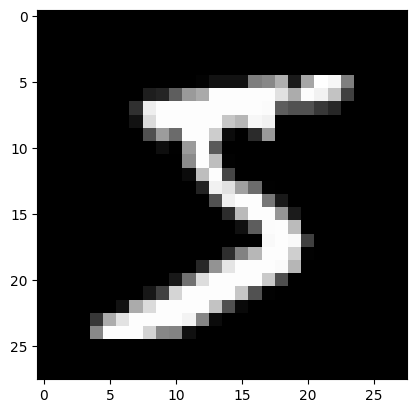

In [6]:
numpy_img = trainloader.dataset.train_data[0].numpy()
plt.imshow(numpy_img, cmap='gray')

In [40]:
class MNIST_Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=4)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=4)
    self.conv3 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=4)

    self.fc1 = nn.Linear(2 * 2 * 32, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 64)
    self.fc5 = nn.Linear(64, 32)
    self.fc6 = nn.Linear(32, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2)
    x = self.conv2(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2, padding=1)
    x = self.conv3(x)
    x = F.relu(x)
    x = F.max_pool2d(x, kernel_size=2, stride=2, padding=1)

    # print(x.shape)

    x = x.view(-1, 2 * 2 * 32)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = self.fc6(x)
    return x


In [41]:
MNIST_net = MNIST_Classifier()

summary(MNIST_net.cuda(), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 25, 25]             544
            Conv2d-2             [-1, 32, 9, 9]          16,416
            Conv2d-3             [-1, 32, 2, 2]          16,416
            Linear-4                  [-1, 256]          33,024
            Linear-5                  [-1, 128]          32,896
            Linear-6                   [-1, 64]           8,256
            Linear-7                   [-1, 64]           4,160
            Linear-8                   [-1, 32]           2,080
            Linear-9                   [-1, 10]             330
Total params: 114,122
Trainable params: 114,122
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.18
Params size (MB): 0.44
Estimated Total Size (MB): 0.62
-------------------------------------------

In [42]:
batch = []

batch = next(iter(trainloader))

MNIST_net.forward(torch.FloatTensor(batch[0]).cuda())

tensor([[ 0.1562,  0.1283,  0.1081, -0.1070,  0.1233,  0.0396, -0.1267,  0.0680,
          0.0629, -0.0320],
        [ 0.1561,  0.1283,  0.1081, -0.1073,  0.1232,  0.0395, -0.1267,  0.0679,
          0.0628, -0.0320],
        [ 0.1562,  0.1283,  0.1077, -0.1063,  0.1236,  0.0397, -0.1268,  0.0680,
          0.0633, -0.0318],
        [ 0.1561,  0.1284,  0.1080, -0.1064,  0.1232,  0.0398, -0.1264,  0.0678,
          0.0633, -0.0315]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [45]:
loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-4
optimizer = torch.optim.Adam(MNIST_net.parameters(), lr=learning_rate)
losses = []

In [46]:
cnt = 0
temp = 0
for i, batch in enumerate(tqdm_notebook(trainloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        cnt = i
        if i % 2000 == 1999:
          temp += 1
cnt, temp

<ipython-input-46-d1e6b9c65e68>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/15000 [00:00<?, ?it/s]

(14999, 7)

In [47]:
for epoch in tqdm_notebook(range(15)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        X_batch, y_batch = batch

        # обнуляем веса
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = MNIST_net(X_batch.to(device))
        loss = loss_fn(y_pred, y_batch.to(device))
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выведем качество каждые 2000 батчей
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            losses.append(running_loss)
            running_loss = 0.0

print('Обучение закончено')

<ipython-input-47-aecdb98fe68d>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm_notebook(range(15)):


  0%|          | 0/15 [00:00<?, ?it/s]

<ipython-input-47-aecdb98fe68d>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, batch in enumerate(tqdm_notebook(trainloader)):


  0%|          | 0/15000 [00:00<?, ?it/s]

[1,  2000] loss: 1.342
[1,  4000] loss: 0.684
[1,  6000] loss: 0.477
[1,  8000] loss: 0.349
[1, 10000] loss: 0.262
[1, 12000] loss: 0.206
[1, 14000] loss: 0.174


  0%|          | 0/15000 [00:00<?, ?it/s]

[2,  2000] loss: 0.139
[2,  4000] loss: 0.128
[2,  6000] loss: 0.116
[2,  8000] loss: 0.128
[2, 10000] loss: 0.103
[2, 12000] loss: 0.105
[2, 14000] loss: 0.100


  0%|          | 0/15000 [00:00<?, ?it/s]

[3,  2000] loss: 0.083
[3,  4000] loss: 0.085
[3,  6000] loss: 0.080
[3,  8000] loss: 0.078
[3, 10000] loss: 0.072
[3, 12000] loss: 0.071
[3, 14000] loss: 0.068


  0%|          | 0/15000 [00:00<?, ?it/s]

[4,  2000] loss: 0.055
[4,  4000] loss: 0.057
[4,  6000] loss: 0.057
[4,  8000] loss: 0.064
[4, 10000] loss: 0.059
[4, 12000] loss: 0.058
[4, 14000] loss: 0.051


  0%|          | 0/15000 [00:00<?, ?it/s]

[5,  2000] loss: 0.048
[5,  4000] loss: 0.044
[5,  6000] loss: 0.047
[5,  8000] loss: 0.043
[5, 10000] loss: 0.047
[5, 12000] loss: 0.038
[5, 14000] loss: 0.048


  0%|          | 0/15000 [00:00<?, ?it/s]

[6,  2000] loss: 0.035
[6,  4000] loss: 0.037
[6,  6000] loss: 0.041
[6,  8000] loss: 0.046
[6, 10000] loss: 0.031
[6, 12000] loss: 0.039
[6, 14000] loss: 0.038


  0%|          | 0/15000 [00:00<?, ?it/s]

[7,  2000] loss: 0.031
[7,  4000] loss: 0.030
[7,  6000] loss: 0.031
[7,  8000] loss: 0.032
[7, 10000] loss: 0.035
[7, 12000] loss: 0.040
[7, 14000] loss: 0.035


  0%|          | 0/15000 [00:00<?, ?it/s]

[8,  2000] loss: 0.028
[8,  4000] loss: 0.023
[8,  6000] loss: 0.031
[8,  8000] loss: 0.027
[8, 10000] loss: 0.029
[8, 12000] loss: 0.028
[8, 14000] loss: 0.025


  0%|          | 0/15000 [00:00<?, ?it/s]

[9,  2000] loss: 0.021
[9,  4000] loss: 0.024
[9,  6000] loss: 0.021
[9,  8000] loss: 0.030
[9, 10000] loss: 0.023
[9, 12000] loss: 0.024
[9, 14000] loss: 0.026


  0%|          | 0/15000 [00:00<?, ?it/s]

[10,  2000] loss: 0.020
[10,  4000] loss: 0.020
[10,  6000] loss: 0.024
[10,  8000] loss: 0.018
[10, 10000] loss: 0.020
[10, 12000] loss: 0.023
[10, 14000] loss: 0.022


  0%|          | 0/15000 [00:00<?, ?it/s]

[11,  2000] loss: 0.017
[11,  4000] loss: 0.015
[11,  6000] loss: 0.017
[11,  8000] loss: 0.018
[11, 10000] loss: 0.020
[11, 12000] loss: 0.020
[11, 14000] loss: 0.020


  0%|          | 0/15000 [00:00<?, ?it/s]

[12,  2000] loss: 0.017
[12,  4000] loss: 0.014
[12,  6000] loss: 0.015
[12,  8000] loss: 0.016
[12, 10000] loss: 0.019
[12, 12000] loss: 0.017
[12, 14000] loss: 0.017


  0%|          | 0/15000 [00:00<?, ?it/s]

[13,  2000] loss: 0.014
[13,  4000] loss: 0.016
[13,  6000] loss: 0.016
[13,  8000] loss: 0.010
[13, 10000] loss: 0.018
[13, 12000] loss: 0.010
[13, 14000] loss: 0.020


  0%|          | 0/15000 [00:00<?, ?it/s]

[14,  2000] loss: 0.014
[14,  4000] loss: 0.011
[14,  6000] loss: 0.012
[14,  8000] loss: 0.012
[14, 10000] loss: 0.017
[14, 12000] loss: 0.017
[14, 14000] loss: 0.013


  0%|          | 0/15000 [00:00<?, ?it/s]

[15,  2000] loss: 0.010
[15,  4000] loss: 0.015
[15,  6000] loss: 0.008
[15,  8000] loss: 0.014
[15, 10000] loss: 0.015
[15, 12000] loss: 0.013
[15, 14000] loss: 0.012
Обучение закончено


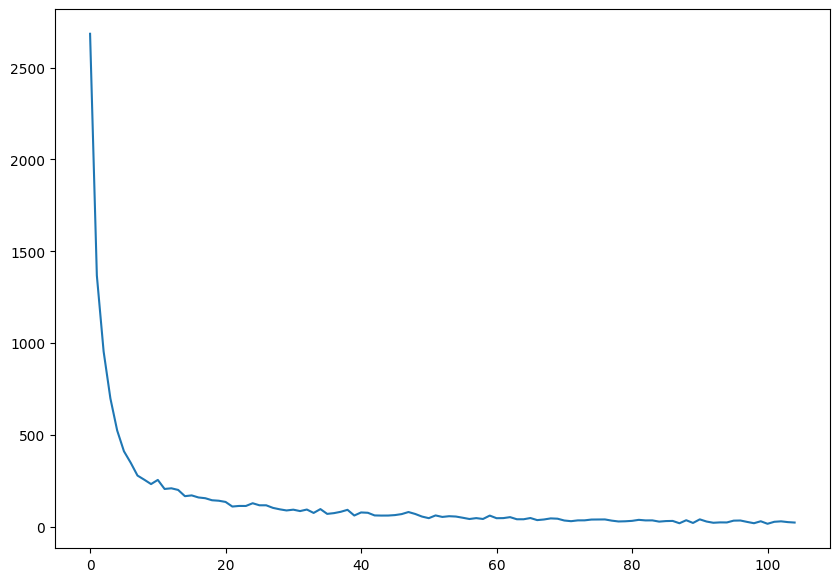

In [48]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.arange(len(losses)), losses)
plt.show()

In [49]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = MNIST_net(images.to(device))
        _, predicted = torch.max(y_pred, 1)

        c = (predicted.cpu().detach() == labels)
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 99 %
Accuracy of     1 : 99 %
Accuracy of     2 : 98 %
Accuracy of     3 : 99 %
Accuracy of     4 : 99 %
Accuracy of     5 : 98 %
Accuracy of     6 : 98 %
Accuracy of     7 : 99 %
Accuracy of     8 : 99 %
Accuracy of     9 : 99 %


In [50]:
total = 0
res = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = MNIST_net(images.to(device))
        _, predicted = torch.max(y_pred, 1)

        c = (predicted.cpu().detach() == labels)

        res += sum(map(int, c))
        total += len(c)
    print(f'Accuracy: {res / total * 100}%')

Accuracy: 99.24%
